# Sensor correction

Load raw hyperspectral scenes and apply relevant sensor corrections.

In [6]:
import os
import hylite

In [ ]:
from hylite.sensors import Fenix # import sensor used to capture data here

## Select images to process

In [21]:
# link to folder containing Fenix data
paths = [
    
    '/Users/thiele67/Documents/Data/CA/Terrestrial/2019/Corta_Atalaya__84_0m00_2m00_0078',
    '/Users/thiele67/Documents/Data/CA/Terrestrial/2019/Corta_Atalaya__85_0m00_2m00_0079',
    '/Users/thiele67/Documents/Data/CA/Terrestrial/2019/Corta_Atalaya__86_0m00_2m00_0080',
    '/Users/thiele67/Documents/Data/CA/Terrestrial/2019/Corta_Atalaya__87_0m00_2m00_0081',
    '/Users/thiele67/Documents/Data/CA/Terrestrial/2019/Corta_Atalaya__88_0m00_2m00_0082'
    
    # add more files here if need be
]

In [23]:
#specify output directory
outdir = '/Users/thiele67/Documents/Data/CA/Terrestrial/2019'

## Apply sensor corrections

In [24]:
# apply sensor corrections to images
images = [ Fenix.correct_folder( p, 
                                flip = False, # set flip to True if camera was mounted backwards (incorrect lens corr)
                                shift = False, # set to true to correct for spatial shift between VNIR and SWIR
                                verbose=True ) for p in paths ]


Loading image /Users/thiele67/Documents/Data/CA/Terrestrial/2019/Corta_Atalaya__84_0m00_2m00_0078/capture/Corta_Atalaya__84_0m00_2m00_0078.hdr
Converting to radiance... DONE.
Filtering bad pixels... DONE.
Applying lens correction... DONE.

Loading image /Users/thiele67/Documents/Data/CA/Terrestrial/2019/Corta_Atalaya__85_0m00_2m00_0079/capture/Corta_Atalaya__85_0m00_2m00_0079.hdr
Converting to radiance... DONE.
Filtering bad pixels... DONE.
Applying lens correction... DONE.

Loading image /Users/thiele67/Documents/Data/CA/Terrestrial/2019/Corta_Atalaya__86_0m00_2m00_0080/capture/Corta_Atalaya__86_0m00_2m00_0080.hdr
Converting to radiance... DONE.
Filtering bad pixels... DONE.
Applying lens correction... DONE.

Loading image /Users/thiele67/Documents/Data/CA/Terrestrial/2019/Corta_Atalaya__87_0m00_2m00_0081/capture/Corta_Atalaya__87_0m00_2m00_0081.hdr
Converting to radiance... DONE.
Filtering bad pixels... DONE.
Applying lens correction... DONE.

Loading image /Users/thiele67/Documents

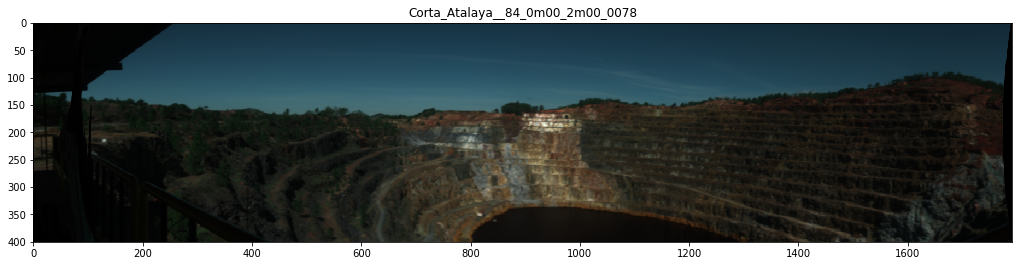

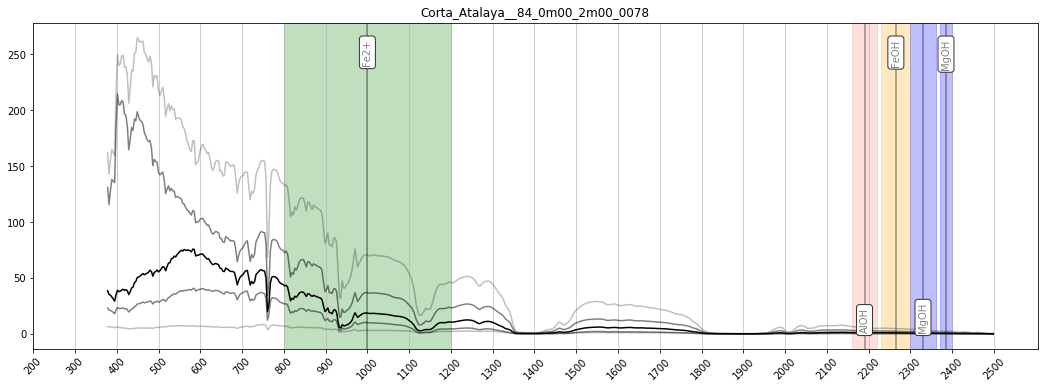

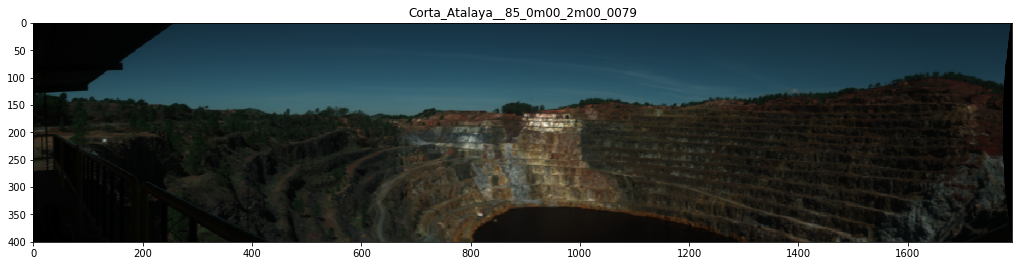

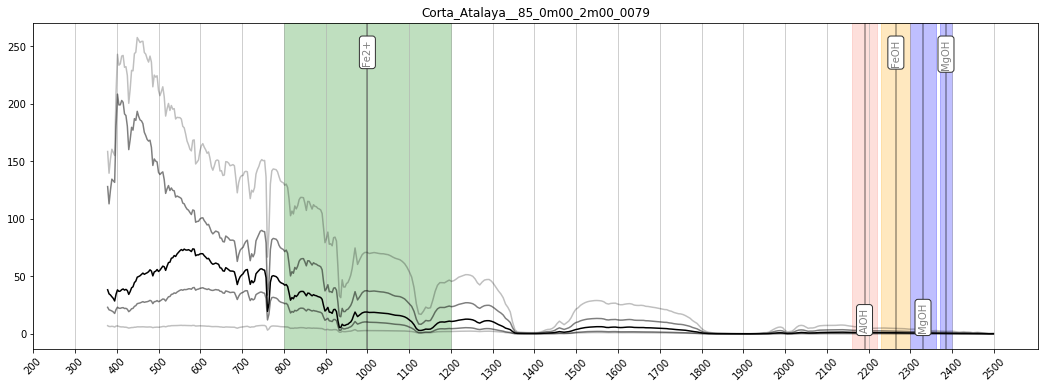

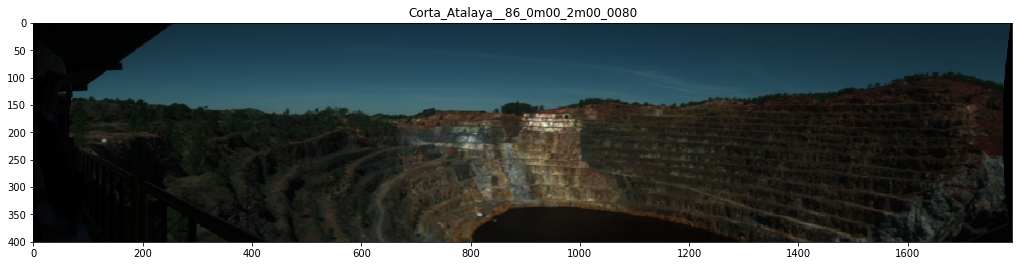

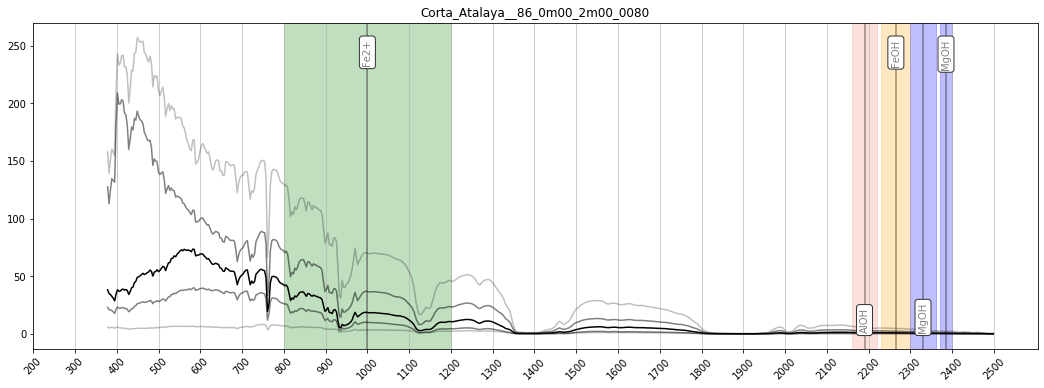

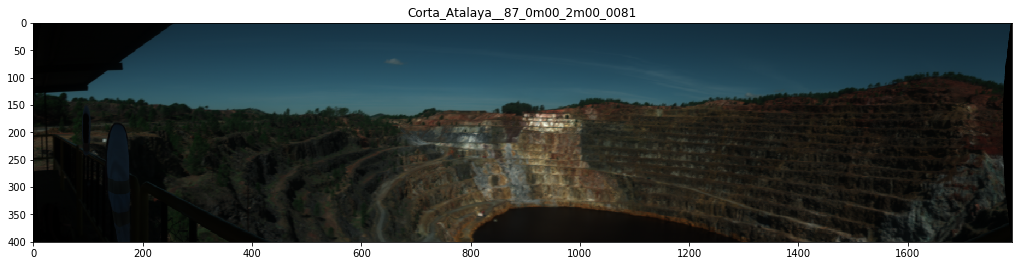

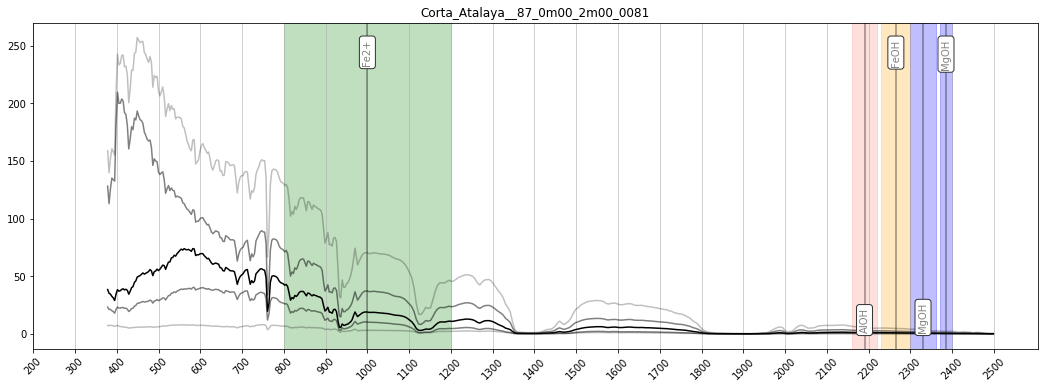

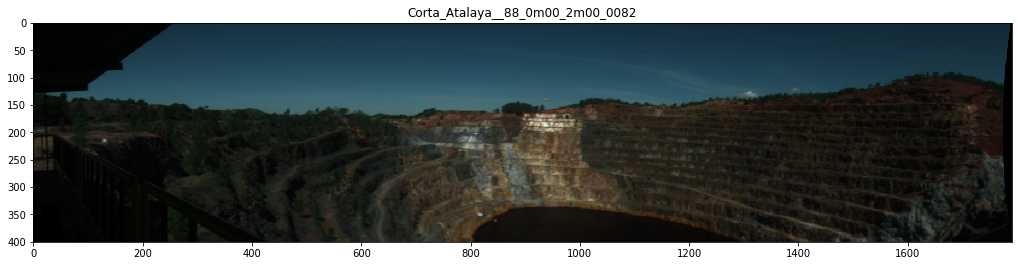

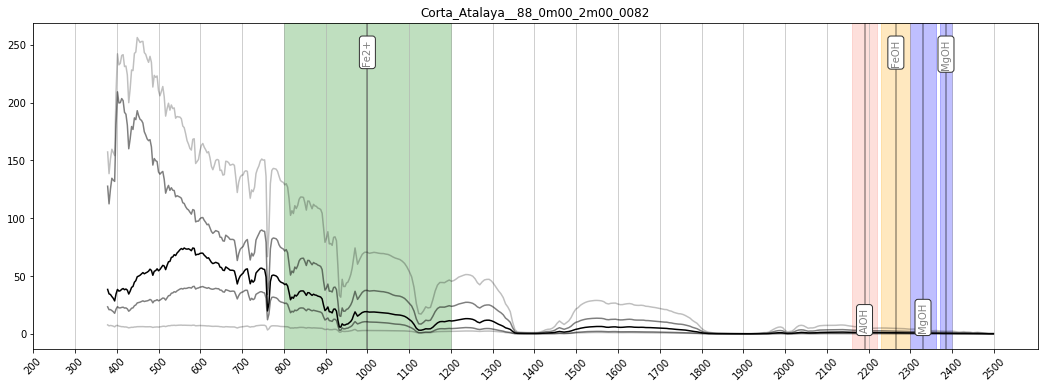

In [25]:
# plot preview
for i,image in enumerate(images):
    fig,ax = image.quick_plot( hylite.RGB )
    ax.set_title( os.path.basename( paths[i] ) )
    fig.show()
                 
    fig, ax = image.plot_spectra()
    ax.set_title( os.path.basename( paths[i] ) )
    fig.show()

Save sensor corrected images

In [26]:
for i,image in enumerate(images):
    outpath = os.path.join(outdir, os.path.basename(paths[i]) + "_sc.hdr")
    io.saveWithGDAL(outpath, image)